In [1]:
# Import libraries

import os, sys, warnings
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from IPython.display import Markdown as md

In [9]:
# Load the data
# Note on name convention:
#  Q: Q-Lambda method. #_## refers to lambda value
#  S: Sarsa-lambda method. #_## refers to the lmabda value

# H: Hits
# SR: Sum of rewards
# VAR: Variance

# Load Q-Lambda data
Q0_00H, Q0_00SR, Q0_00VAR = np.loadtxt('Q-Learning_alpha_0_02.txt', delimiter = ',', skiprows = 1, usecols = (1, 2, 3), unpack = True)
Q0_33H, Q0_33SR, Q0_33VAR = np.loadtxt('Q-Lambda-Learning_Lambda_0_33.txt', delimiter = ',', skiprows = 1, usecols = (1, 2, 3), unpack = True)
Q0_66H, Q0_66SR, Q0_66VAR = np.loadtxt('Q-Lambda-Learning_Lambda_0_66.txt', delimiter = ',', skiprows = 1, usecols = (1, 2, 3), unpack = True)
Q1_00H, Q1_00SR, Q1_00VAR = np.loadtxt('Q-Lambda-Learning_Lambda_1.txt', delimiter = ',', skiprows = 1, usecols = (1, 2, 3), unpack = True)

# Load Sarsa-Lambda data
S0_00H, S0_00SR, S0_00VAR = np.loadtxt('Sarsa-Learning_alpha_0_02.txt', delimiter = ',', skiprows = 1, usecols = (1, 2, 3), unpack = True)
S0_33H, S0_33SR, S0_33VAR = np.loadtxt('Sarsa-Lambda-Learning_Lambda_0_33.txt', delimiter = ',', skiprows = 1, usecols = (1, 2, 3), unpack = True)
S0_66H, S0_66SR, S0_66VAR = np.loadtxt('Sarsa-Lambda-Learning_Lambda_0_66.txt', delimiter = ',', skiprows = 1, usecols = (1, 2, 3), unpack = True)
S1_00H, S1_00SR, S1_00VAR = np.loadtxt('Sarsa-Lambda-Learning_Lambda_1_0.txt', delimiter = ',', skiprows = 1, usecols = (1, 2, 3), unpack = True)

# Collect the episodes. It should be the same for all files, so use any random file for it.
Episodes = np.loadtxt('Q-Learning_alpha_0_02.txt', delimiter = ',', skiprows = 1, usecols = 0)

In [10]:
# Calculate the average hit rate for 8 scenarios for the plots
NUM_EPISODES = Episodes.size

Q0_00Acc = np.zeros((NUM_EPISODES))
Q0_33Acc = np.zeros((NUM_EPISODES))
Q0_66Acc = np.zeros((NUM_EPISODES))
Q1_00Acc = np.zeros((NUM_EPISODES))

S0_00Acc = np.zeros((NUM_EPISODES))
S0_33Acc = np.zeros((NUM_EPISODES))
S0_66Acc = np.zeros((NUM_EPISODES))
S1_00Acc = np.zeros((NUM_EPISODES))

Q0_00Acc[0] = Q0_00H[0]
Q0_00Acc[1:] = np.asarray([np.sum(Q0_00H[:n])/(n+1) for n in range(1, NUM_EPISODES)])

Q0_33Acc[0] = Q0_33H[0]
Q0_33Acc[1:] = np.asarray([np.sum(Q0_33H[:n])/(n+1) for n in range(1, NUM_EPISODES)])

Q0_66Acc[0] = Q0_66H[0]
Q0_66Acc[1:] = np.asarray([np.sum(Q0_66H[:n])/(n+1) for n in range(1, NUM_EPISODES)])

Q1_00Acc[0] = Q1_00H[0]
Q1_00Acc[1:] = np.asarray([np.sum(Q1_00H[:n])/(n+1) for n in range(1, NUM_EPISODES)])


S0_00Acc[0] = S0_00H[0]
S0_00Acc[1:] = np.asarray([np.sum(S0_00H[:n])/(n+1) for n in range(1, NUM_EPISODES)])

S0_33Acc[0] = S0_33H[0]
S0_33Acc[1:] = np.asarray([np.sum(S0_33H[:n])/(n+1) for n in range(1, NUM_EPISODES)])

S0_66Acc[0] = S0_66H[0]
S0_66Acc[1:] = np.asarray([np.sum(S0_66H[:n])/(n+1) for n in range(1, NUM_EPISODES)])

S1_00Acc[0] = S1_00H[0]
S1_00Acc[1:] = np.asarray([np.sum(S1_00H[:n])/(n+1) for n in range(1, NUM_EPISODES)])

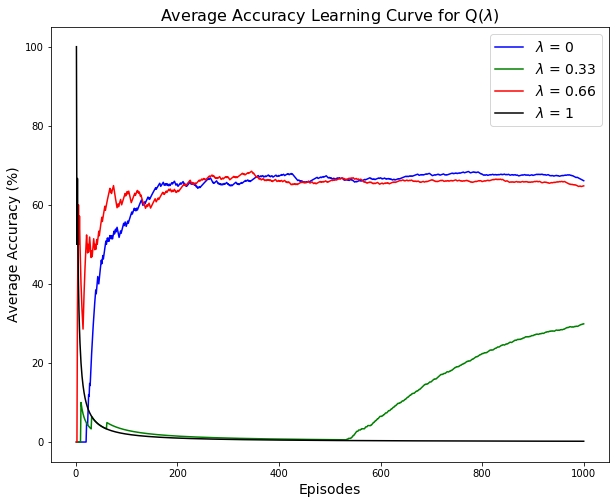

In [20]:
# Create the Q-Lambda plot
fig = plt.figure(figsize = [10, 8])
ax  = fig.add_subplot(1, 1, 1)

ax.set_title(r'Average Accuracy Learning Curve for Q($\lambda$)', fontsize = 16)

ax.plot(Episodes, Q0_00Acc*100, 'b-', linewidth = 1.5, label = r'$\lambda$ = 0')
ax.plot(Episodes, Q0_33Acc*100, 'g-', linewidth = 1.5, label = r'$\lambda$ = 0.33')
ax.plot(Episodes, Q0_66Acc*100, 'r-', linewidth = 1.5, label = r'$\lambda$ = 0.66')
ax.plot(Episodes, Q1_00Acc*100, 'k-', linewidth = 1.5, label = r'$\lambda$ = 1')

ax.legend(fontsize = 14)

ax.set_xlabel('Episodes', fontsize = 14)
ax.set_ylabel('Average Accuracy (%)', fontsize = 14)

plt.savefig('Q-Lambda-Learning_Curve.png')
plt.show(block = False)

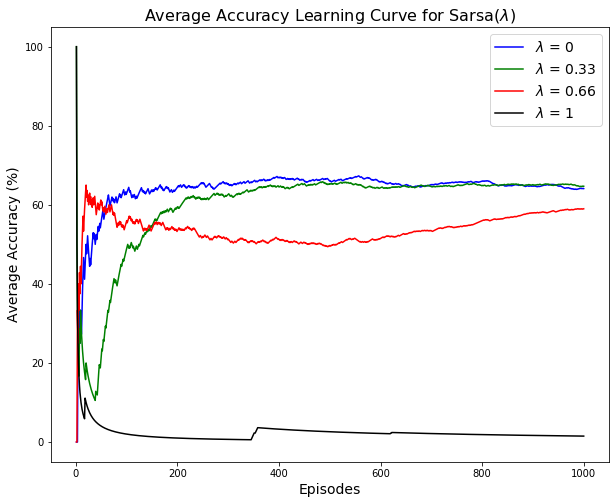

In [21]:
# Create the Q-Lambda plot
fig = plt.figure(figsize = [10, 8])
ax  = fig.add_subplot(1, 1, 1)

ax.set_title(r'Average Accuracy Learning Curve for Sarsa($\lambda$)', fontsize = 16)

ax.plot(Episodes, S0_00Acc*100, 'b-', linewidth = 1.5, label = r'$\lambda$ = 0')
ax.plot(Episodes, S0_33Acc*100, 'g-', linewidth = 1.5, label = r'$\lambda$ = 0.33')
ax.plot(Episodes, S0_66Acc*100, 'r-', linewidth = 1.5, label = r'$\lambda$ = 0.66')
ax.plot(Episodes, S1_00Acc*100, 'k-', linewidth = 1.5, label = r'$\lambda$ = 1')

ax.legend(fontsize = 14)

ax.set_xlabel('Episodes', fontsize = 14)
ax.set_ylabel('Average Accuracy (%)', fontsize = 14)

plt.savefig('Sarsa-Lambda-Learning_Curve.png')
plt.show(block = False)

In [25]:
# Display the full variance
print('Variance for Q:')
print('lambda = 0  lambda = 0.33  lambda = 0.66  lambda = 1')
print(np.round(np.mean(Q0_00VAR),2), np.round(np.mean(Q0_33VAR),2),np.round(np.mean(Q0_66VAR),2),np.round(np.mean(Q1_00VAR),2))

Variance for Q:
lambda = 0  lambda = 0.33  lambda = 0.66  lambda = 1
0.17 0.02 0.02 0.02


In [26]:
# Display the variance after stabalizing (around 600+ episodes according to the figures above)
ind = np.where(Episodes > 600)[0]
print('Variance for Q:')
print('lambda = 0  lambda = 0.33  lambda = 0.66  lambda = 1')
print(np.round(np.mean(Q0_00VAR[ind]),2), np.round(np.mean(Q0_33VAR[ind]),2),np.round(np.mean(Q0_66VAR[ind]),2),np.round(np.mean(Q1_00VAR[ind]),2))

Variance for Q:
lambda = 0  lambda = 0.33  lambda = 0.66  lambda = 1
0.18 0.01 0.01 0.01


In [27]:
# Display the full variance
print('Variance for Sarsa:')
print('lambda = 0  lambda = 0.33  lambda = 0.66  lambda = 1')
print(np.round(np.mean(S0_00VAR),2), np.round(np.mean(S0_33VAR),2),np.round(np.mean(S0_66VAR),2),np.round(np.mean(S1_00VAR),2))

Variance for Sarsa:
lambda = 0  lambda = 0.33  lambda = 0.66  lambda = 1
0.19 0.28 0.25 0.03


In [28]:
# Display the variance after stabalizing (around 600+ episodes according to the figures above)
ind = np.where(Episodes > 600)[0]
print('Variance for Sarsa:')
print('lambda = 0  lambda = 0.33  lambda = 0.66  lambda = 1')
print(np.round(np.mean(S0_00VAR[ind]),2), np.round(np.mean(S0_33VAR[ind]),2),np.round(np.mean(S0_66VAR[ind]),2),np.round(np.mean(S1_00VAR[ind]),2))

Variance for Sarsa:
lambda = 0  lambda = 0.33  lambda = 0.66  lambda = 1
0.21 0.24 0.28 0.03


In [30]:
# Display the average accuracy at the end.
print('Average Accuracy for Q:')
print('lambda = 0  lambda = 0.33  lambda = 0.66  lambda = 1')

print(Q0_00Acc[-1]*100, Q0_33Acc[-1]*100, Q0_66Acc[-1]*100, Q1_00Acc[-1]*100)

Average Accuracy for Q:
lambda = 0  lambda = 0.33  lambda = 0.66  lambda = 1
66.10000000000001 29.9 64.8 0.2


In [31]:
# Display the average accuracy at the end.
print('Average Accuracy for Sarsa:')
print('lambda = 0  lambda = 0.33  lambda = 0.66  lambda = 1')

print(S0_00Acc[-1]*100, S0_33Acc[-1]*100, S0_66Acc[-1]*100, S1_00Acc[-1]*100)

Average Accuracy for Sarsa:
lambda = 0  lambda = 0.33  lambda = 0.66  lambda = 1
64.1 64.7 59.0 1.5
